# EDA  Isurance - premium -  prediction


In [118]:
import pandas as pd
import numpy as np
import statsmodels
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import mean_squared_error , confusion_matrix
from sklearn.metrics import r2_score
import pickle
from pandas_profiling import ProfileReport

In [69]:
df = pd.read_csv('insurance.csv')

In [70]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [71]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [73]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [9]:
ProfileReport(df)

In [10]:
df.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


#  DATA  VISUALIZATION

In [13]:
fig = px.histogram(df,x = 'age' , nbins=40 ,color='sex' , marginal='box')

fig.show()

In [16]:
fig = px.histogram(df, x= 'age' , y = 'expenses' , color='sex' , marginal='box')
fig.show()

In [20]:
fig = px.histogram(df,
                    x='expenses',
                    marginal='box',
                    color='smoker',
                    color_discrete_sequence=['green', 'orange'],
                    title="Annual Medical Expenses")

fig.update_layout(bargap=0.1)
fig.show() 

In [24]:
px.histogram(df,x = "smoker" ,color='sex')

In [33]:
px.scatter(df,x="bmi",y='expenses',color= 'smoker')

In [36]:
px.scatter(df,x = 'age' , y = 'expenses')

<AxesSubplot:xlabel='age', ylabel='expenses'>

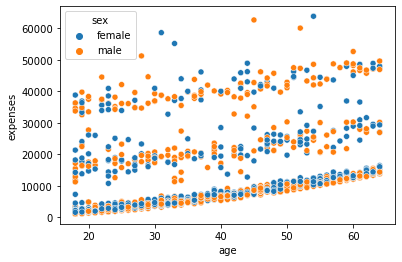

In [45]:
sns.scatterplot(x = 'age' , y = 'expenses',data = df , hue='sex')

<AxesSubplot:>

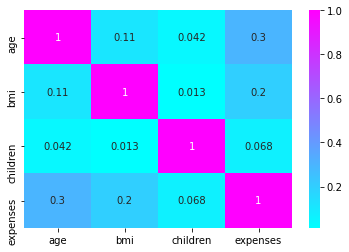

In [55]:
sns.heatmap(df.corr(),cmap='cool' , annot=True)

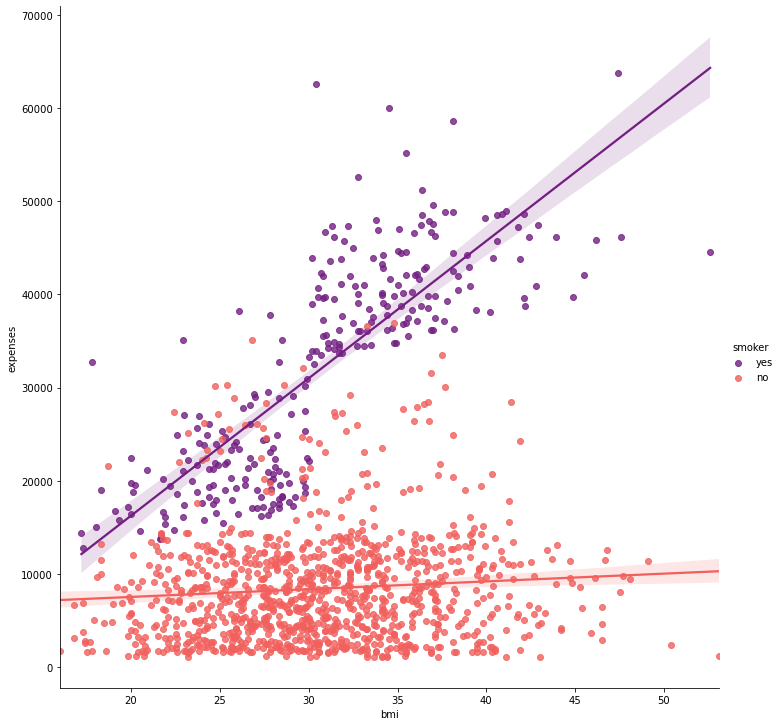

In [62]:
sns.lmplot(x = 'bmi' , y = 'expenses' ,data = df , hue = 'smoker' , palette='magma' , size=10)

#  Feature selection

In [74]:
X = df.drop(columns='expenses' ,axis=1)

In [75]:
y = df['expenses']

# Pipeline for standardscaling and one hot encoding

In [86]:
#For numerical feature we are apllying standardscaler

num_features = ['age' , 'bmi' ,'children']

num_transformer = Pipeline(steps=[('scaler' , StandardScaler())])

# For categorical features we are applying oneHotencoding
cat_features = ['sex' , 'smoker' , 'region']

cat_transformer = OneHotEncoder(drop='first' , sparse=False )

preprocessor = ColumnTransformer(
    transformers= [
        ('num', num_transformer,num_features),
        ('cat', cat_transformer,cat_features)])

# Creating Training and testing data 

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .20,random_state = 42)

In [88]:
print(X_train.shape,y_test.shape)

(1070, 6) (268,)


# This is regression problem 

#  1 : Linear regression model

In [106]:
linear_reg = Pipeline(steps=[('preprocessor' , preprocessor) ,('linear_regression' , LinearRegression())])

linear_reg.fit(X_train,y_train)
y_pred = linear_reg.predict(X_test)

linear_reg_mse = mean_squared_error(y_test, y_pred)
linear_reg_rmse = mean_squared_error(y_test, y_pred, squared=False)
linear_reg_r2_score = r2_score(y_test, y_pred)

print('linear_reg_mse      : ' , linear_reg_mse)
print('linear_reg_rmse     : ' , linear_reg_rmse)
print('linear_reg_r2_score : ',  linear_reg_r2_score)



linear_reg_mse      :  33600065.355077825
linear_reg_rmse     :  5796.556335884076
linear_reg_r2_score :  0.7835726930039906


In [104]:
linear_reg.score(X_train,y_train)

0.7417509671301924

In [94]:
linear_reg.score(X_test,y_test)

0.7835726930039906

#  2 Random forest 

In [107]:
random_reg = Pipeline(steps=[('preprocessor' , preprocessor) , ('random_forest_reg' ,RandomForestRegressor(n_estimators=100,max_depth=4 ,random_state=42))])
random_reg.fit(X_train,y_train)

y_pred_random = random_reg.predict(X_test)

random_forest_mse = mean_squared_error(y_test, y_pred_random)
random_forest_rmse = mean_squared_error(y_test, y_pred_random, squared=False)
random_forest_r2_score = r2_score(y_test, y_pred_random)

print('random_forest_mse : ' , random_forest_mse)
print('random_forest_rmse : ' , random_forest_rmse)
print('random_forest_r2_score : ' ,random_forest_r2_score)

random_forest_mse :  20035725.89872456
random_forest_rmse :  4476.128449757062
random_forest_r2_score :  0.8709443522163913


In [112]:
random_reg.score(X_test,y_test)

0.8709443522163913

In [114]:
random_reg.score(X_train,y_train)

0.8721151795805644

# 3 Decision Tree

In [111]:
decision_tree = Pipeline(steps=[('preprocessor', preprocessor),
                      ('decision_tree_regressor', DecisionTreeRegressor(max_depth=4, min_samples_split=4,random_state=42 ))])
decision_tree.fit(X_train, y_train)

y_pred_decision = decision_tree.predict(X_test)
# Evaluation Metrics
decision_tree_mse = mean_squared_error(y_test, y_pred_decision)
decision_tree_rmse = mean_squared_error(y_test, y_pred_decision, squared=False)
decision_tree_r2_score = r2_score(y_test, y_pred_decision)

print('decision_tree_mse : ',decision_tree_mse)
print('decision_tree_rmse : ',decision_tree_rmse)
print('decision_tree_r2_score : ',decision_tree_r2_score)

decision_tree_mse :  21076774.271162838
decision_tree_rmse :  4590.94481247192
decision_tree_r2_score :  0.8642386719351669


In [115]:
decision_tree.score(X_test,y_test)

0.8642386719351669

In [117]:
decision_tree.score(X_train,y_train)

0.8653039286043259

#  we are selecting random_forest regressor model

In [120]:
pickle.dump(random_reg, open('Random_Forest_regressor_model.pickle', 'wb'))

In [121]:
pwd

'C:\\machine learning\\Projects\\insurance-NIKHIL\\insurance-premium-prediction-main'